In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as st
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sa
from sklearn.preprocessing import LabelEncoder
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [52]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [53]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Outlier

In [54]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [55]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


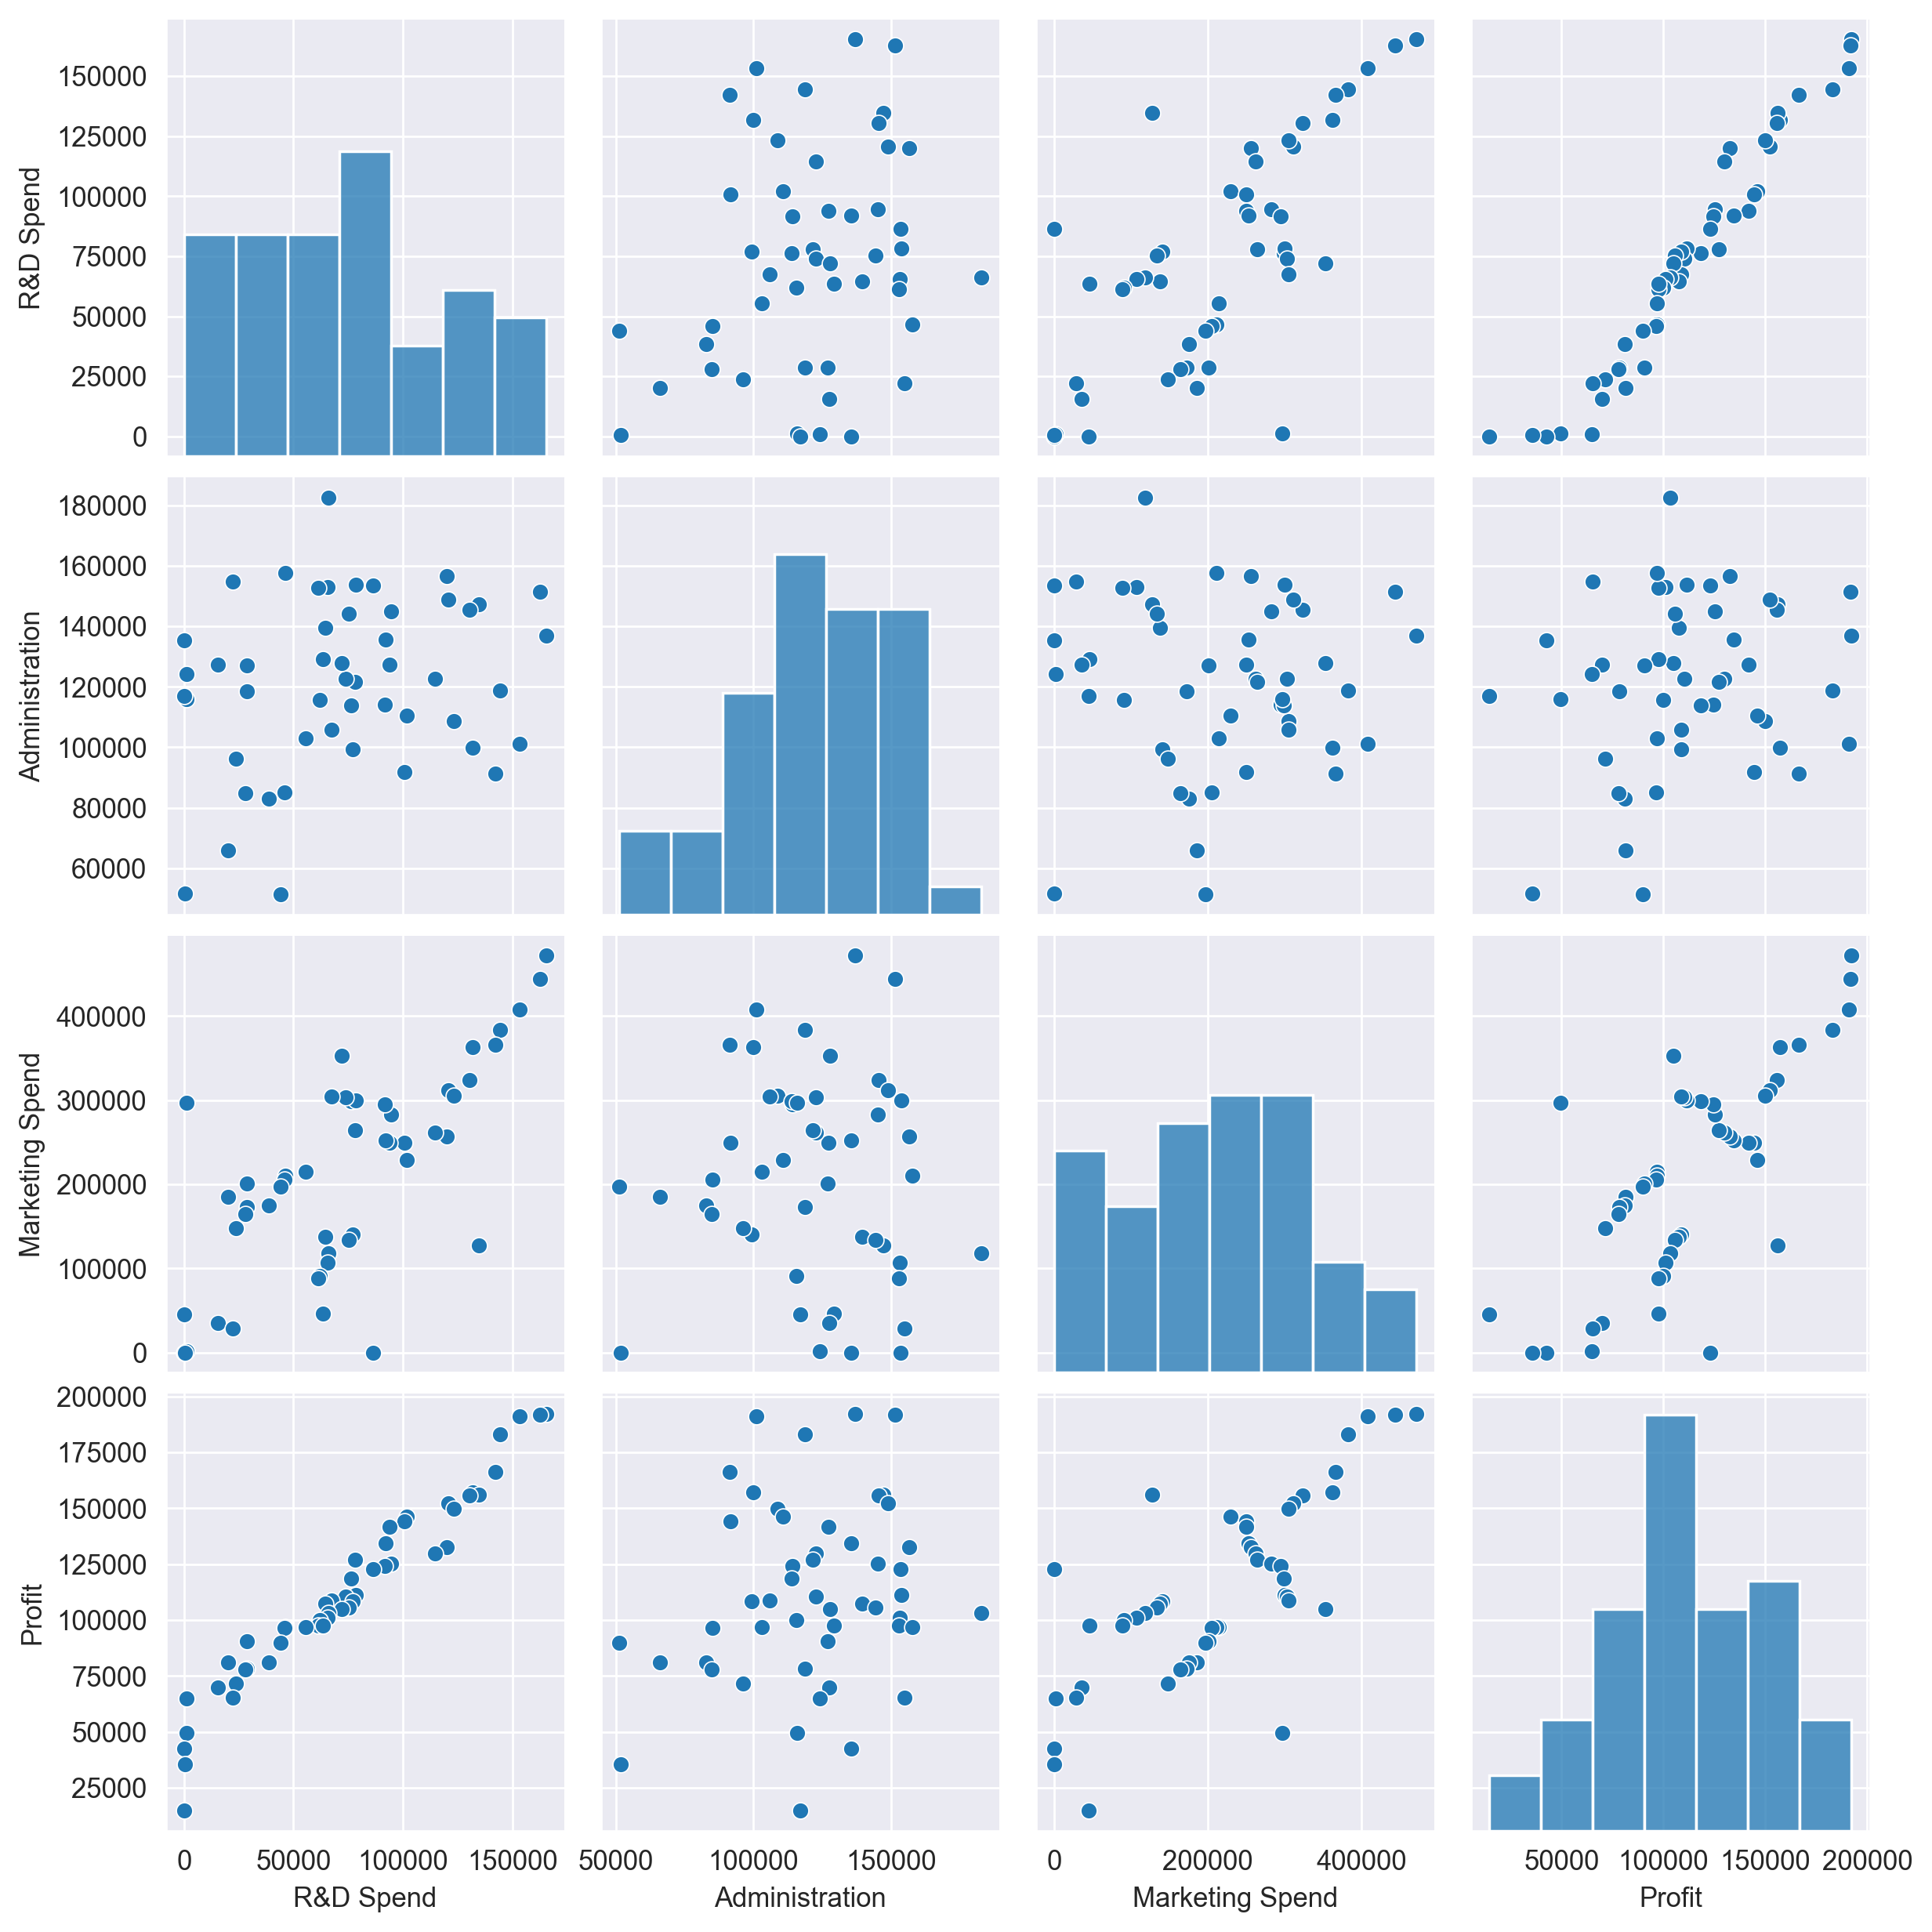

In [56]:
sns.pairplot(df)

<AxesSubplot:>

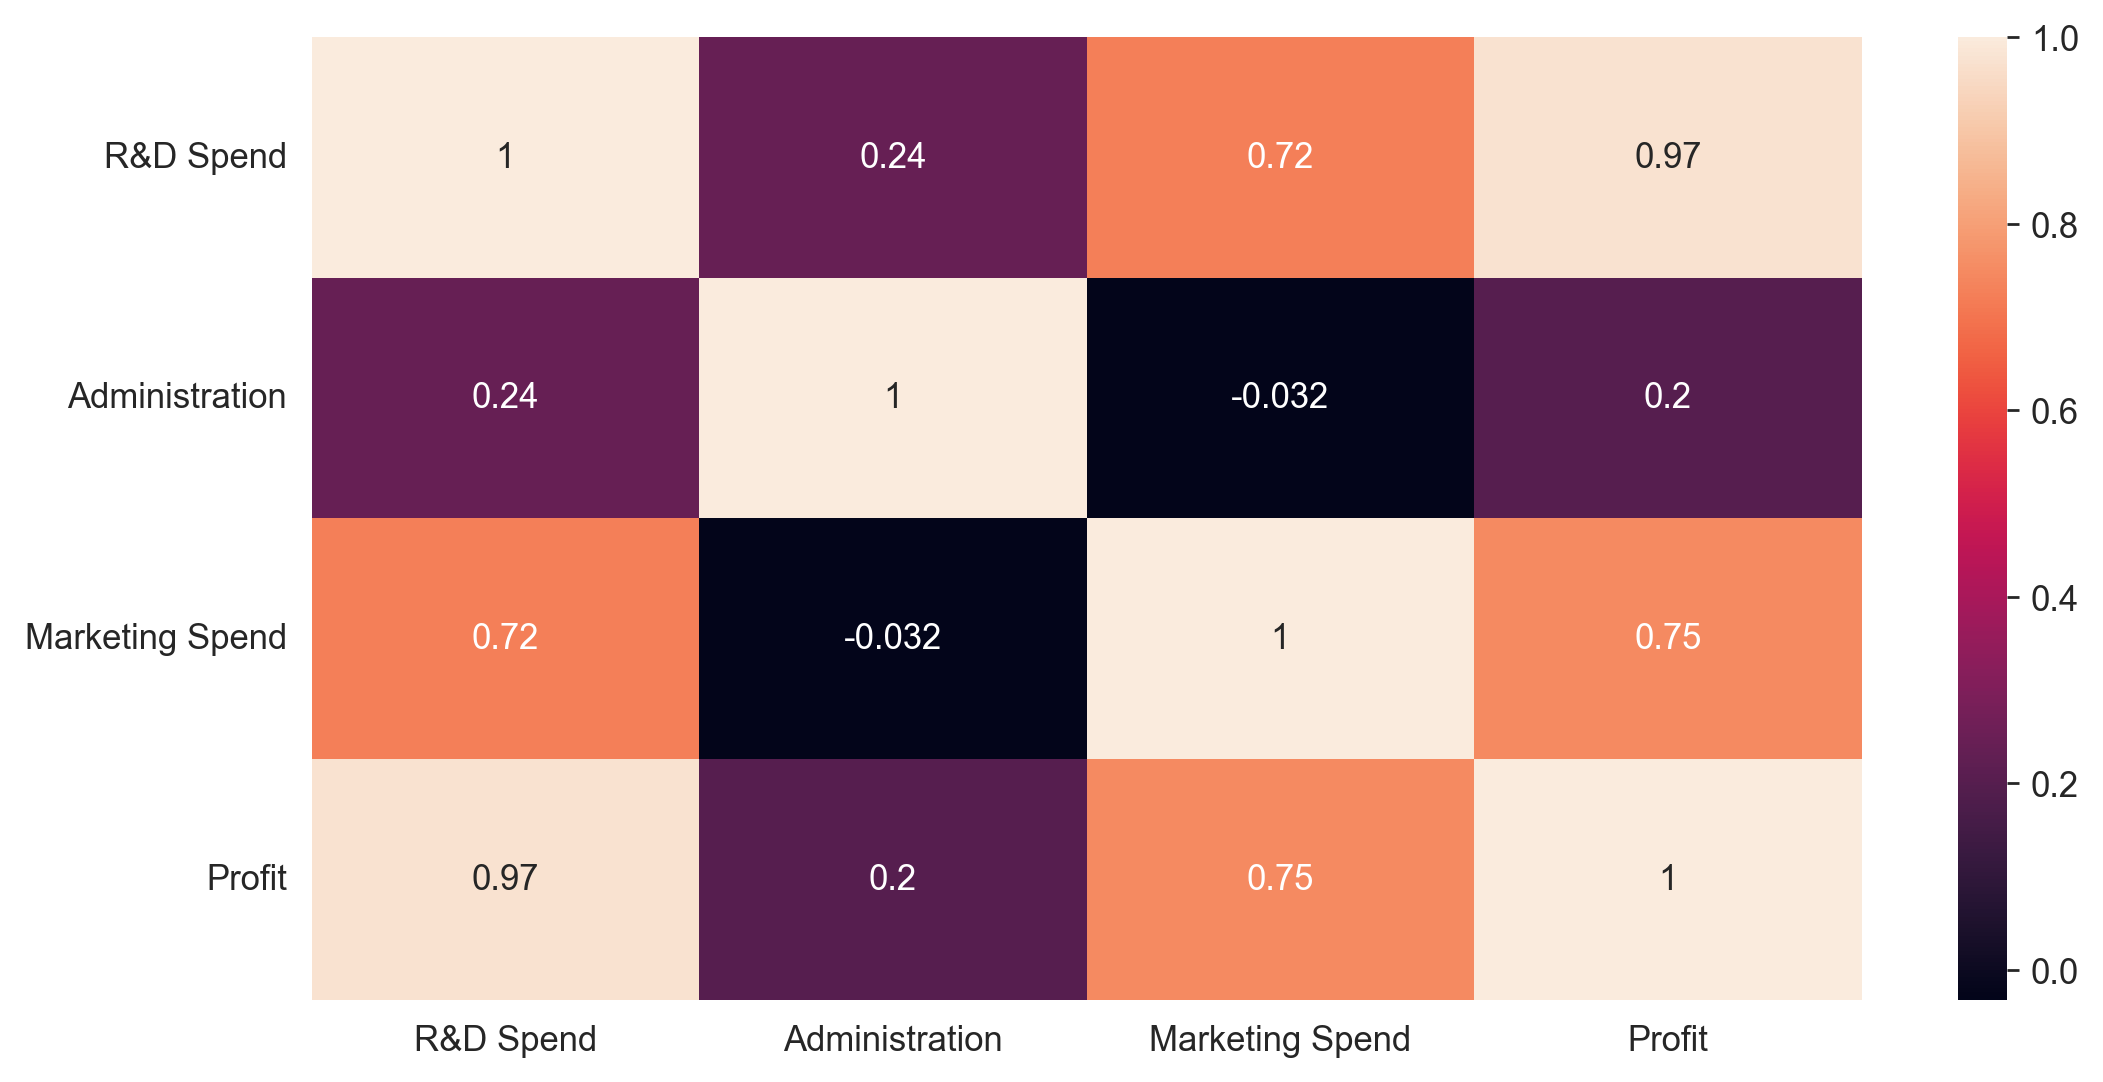

In [57]:
sns.heatmap(df.corr(),annot = True)

In [58]:
#Encoding State to numeric
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Model

In [59]:
df.rename(columns = {'R&D Spend': 'RD_Spend',
                     'Marketing Spend': 'Marketing_Spend'}, inplace = True)

In [60]:
model  = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State', data=df).fit()

# model testing

In [61]:
model.params

Intercept          50142.506443
RD_Spend               0.805760
Administration        -0.026826
Marketing_Spend        0.027228
State                -22.320577
dtype: float64

In [62]:
model.pvalues

Intercept          2.900008e-09
RD_Spend           8.249206e-22
Administration     6.056771e-01
Marketing_Spend    1.086131e-01
State              9.889988e-01
dtype: float64

In [63]:
model.rsquared


0.9507462044842656

# Variance Inflation

In [64]:
vif = pd.DataFrame()
vif['Feature'] = df.columns
vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif.head()


,Feature,vif
0,RD_Spend,30.662561
1,Administration,13.560873
2,Marketing_Spend,9.847180
3,State,2.444870
4,Profit,81.707826


# subset Selection

In [65]:
#R&D model
rd_model = smf.ols('Profit~RD_Spend+Marketing_Spend+State', data=df).fit()

In [66]:
rd_model.aic, rd_model.rsquared

(1059.0707228589933, 0.9504503504444918)

In [67]:
#Administration model
adm_model = smf.ols('Profit~Administration+Marketing_Spend+State', data=df).fit()

In [68]:
adm_model.aic, adm_model.rsquared

(1162.0529996217995, 0.6113727245607464)

In [69]:
#marketing model
mar_model = smf.ols('Profit~Marketing_Spend+Administration+State', data=df).fit()

In [70]:
mar_model.aic, mar_model.rsquared

(1162.0529996217995, 0.6113727245607463)

# Residual Analysis

In [71]:
fmodel = smf.ols('Profit~RD_Spend+Marketing_Spend+State', data=df).fit()

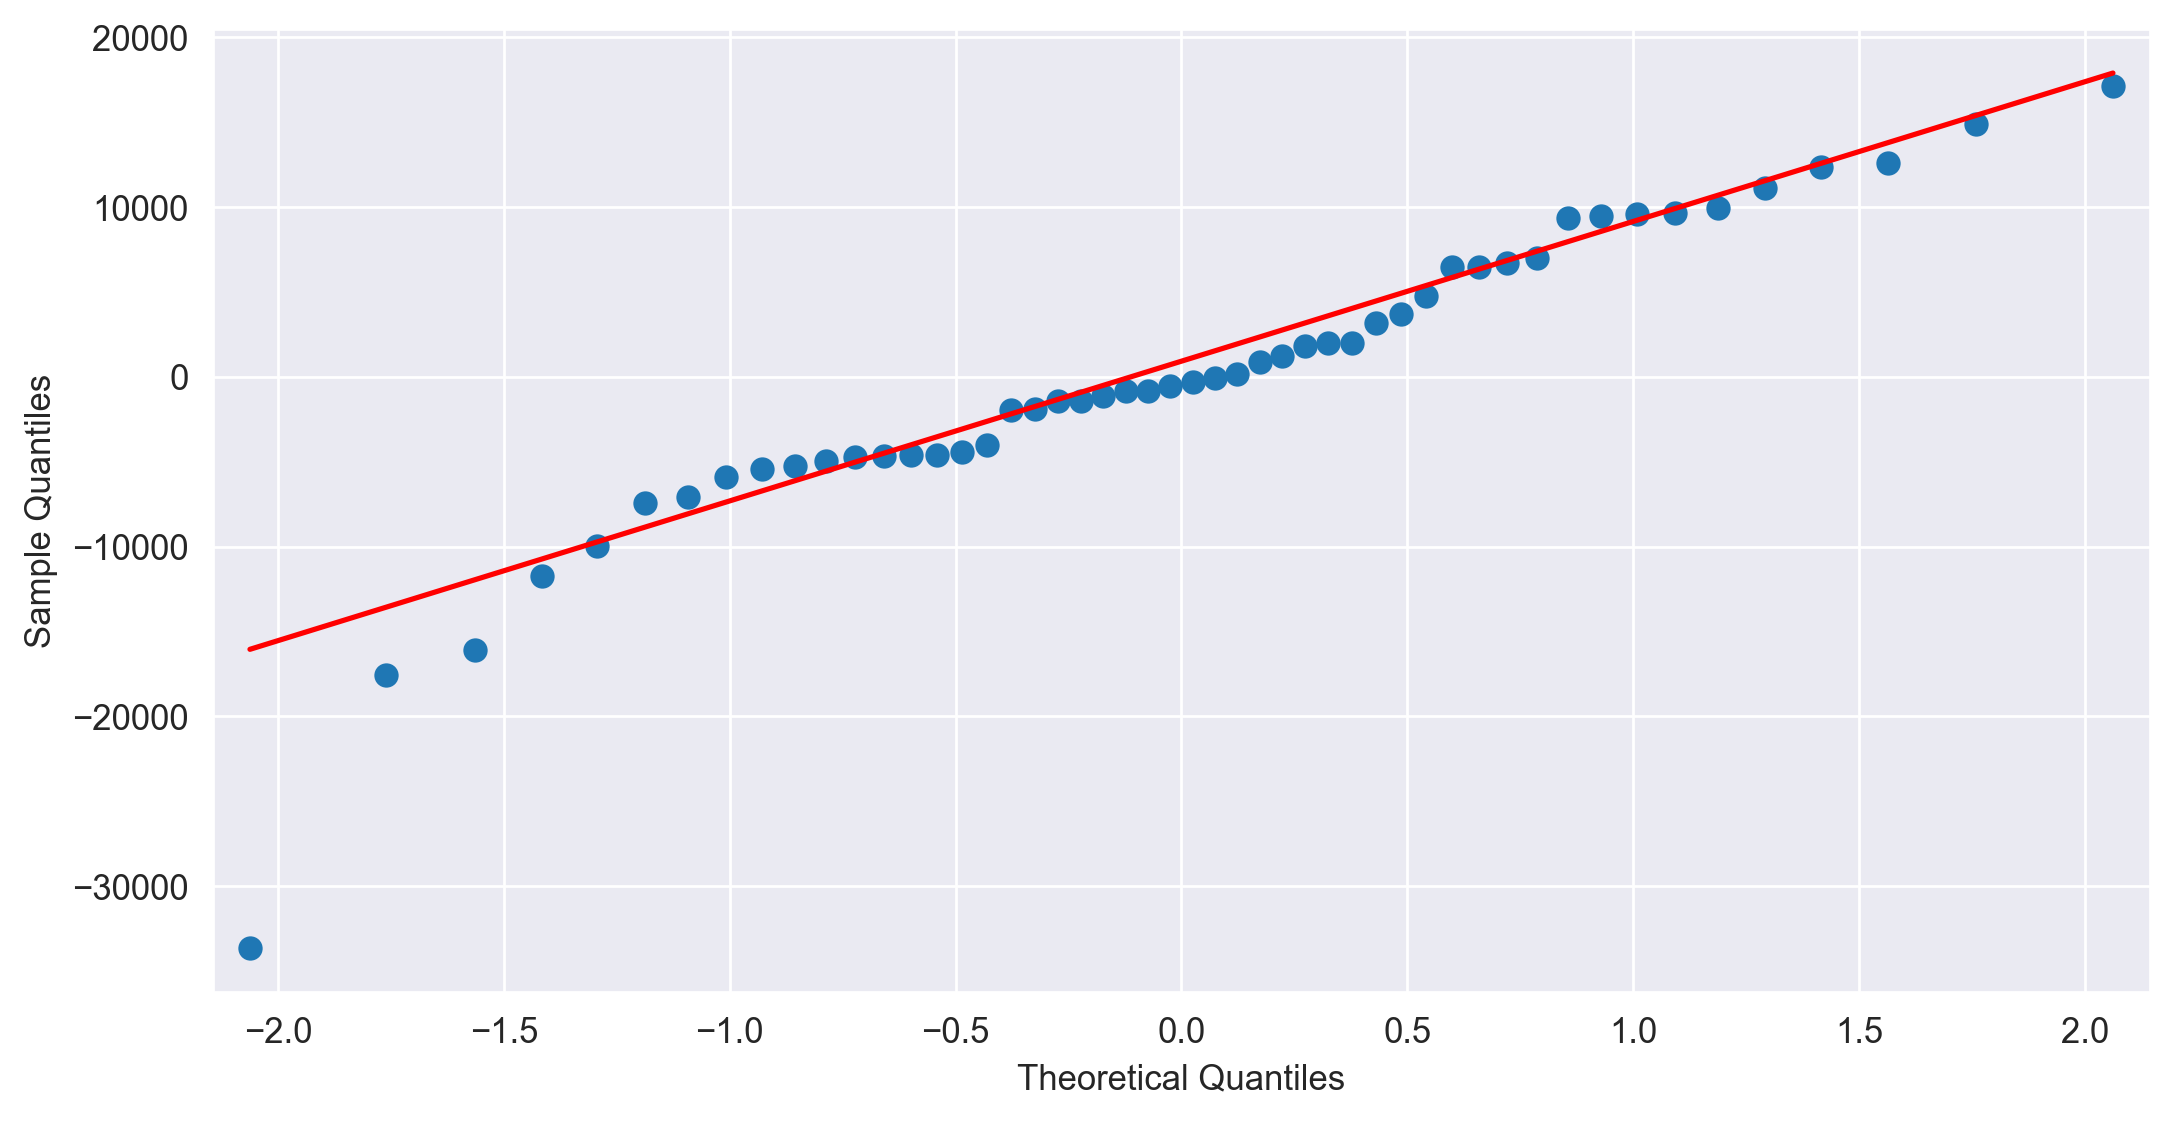

In [72]:
sa.qqplot(fmodel.resid,line='q');

In [73]:
np.where(fmodel.resid<-30000)

(array([49], dtype=int64),)

# Homoscedasticity

Text(0, 0.5, 'Residual values')

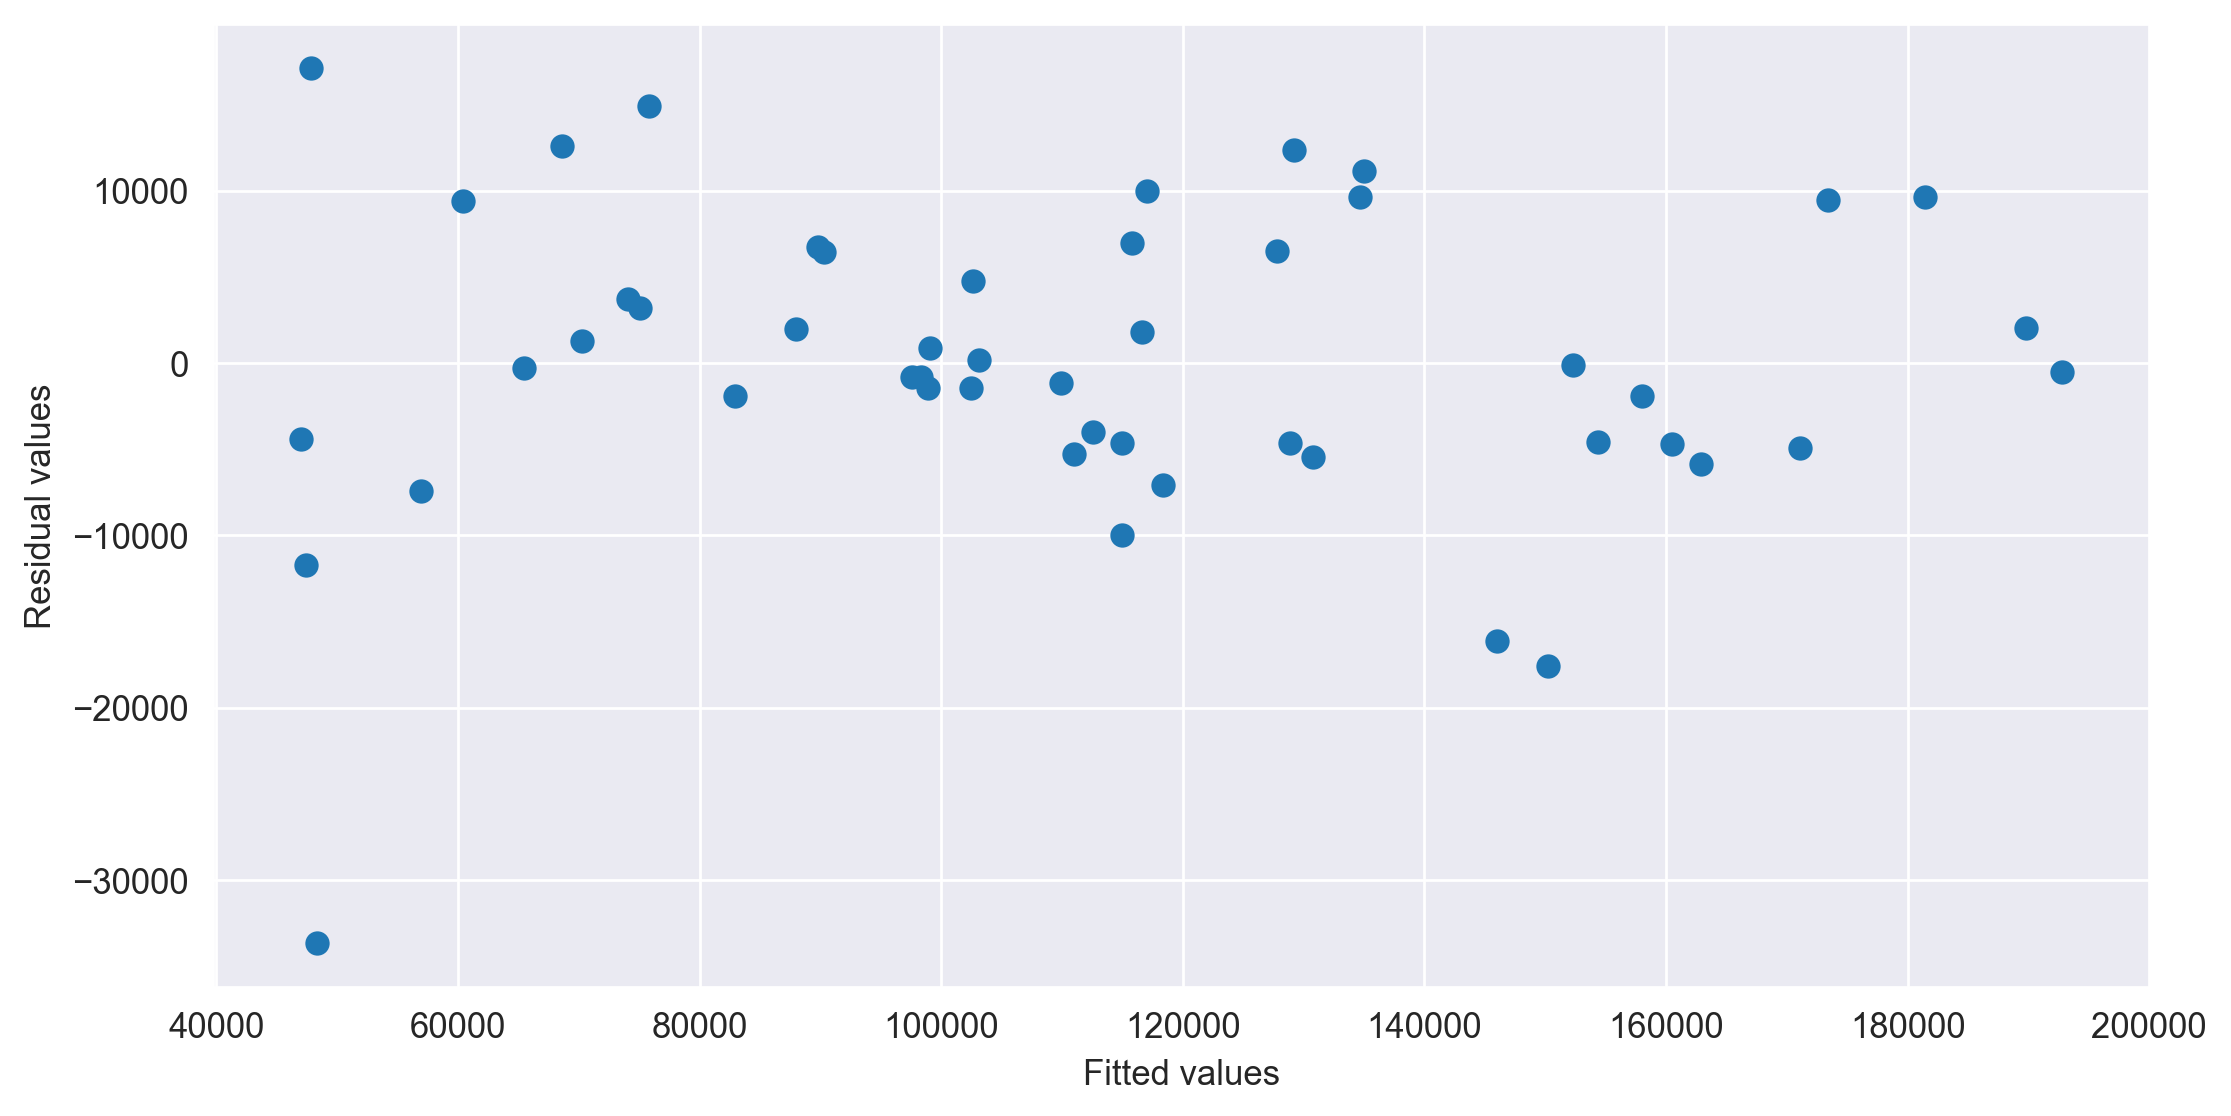

In [74]:
plt.scatter(fmodel.fittedvalues,fmodel.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residual values')

# Residual vs Regressor

eval_env: 1


<Figure size 3750x2000 with 0 Axes>

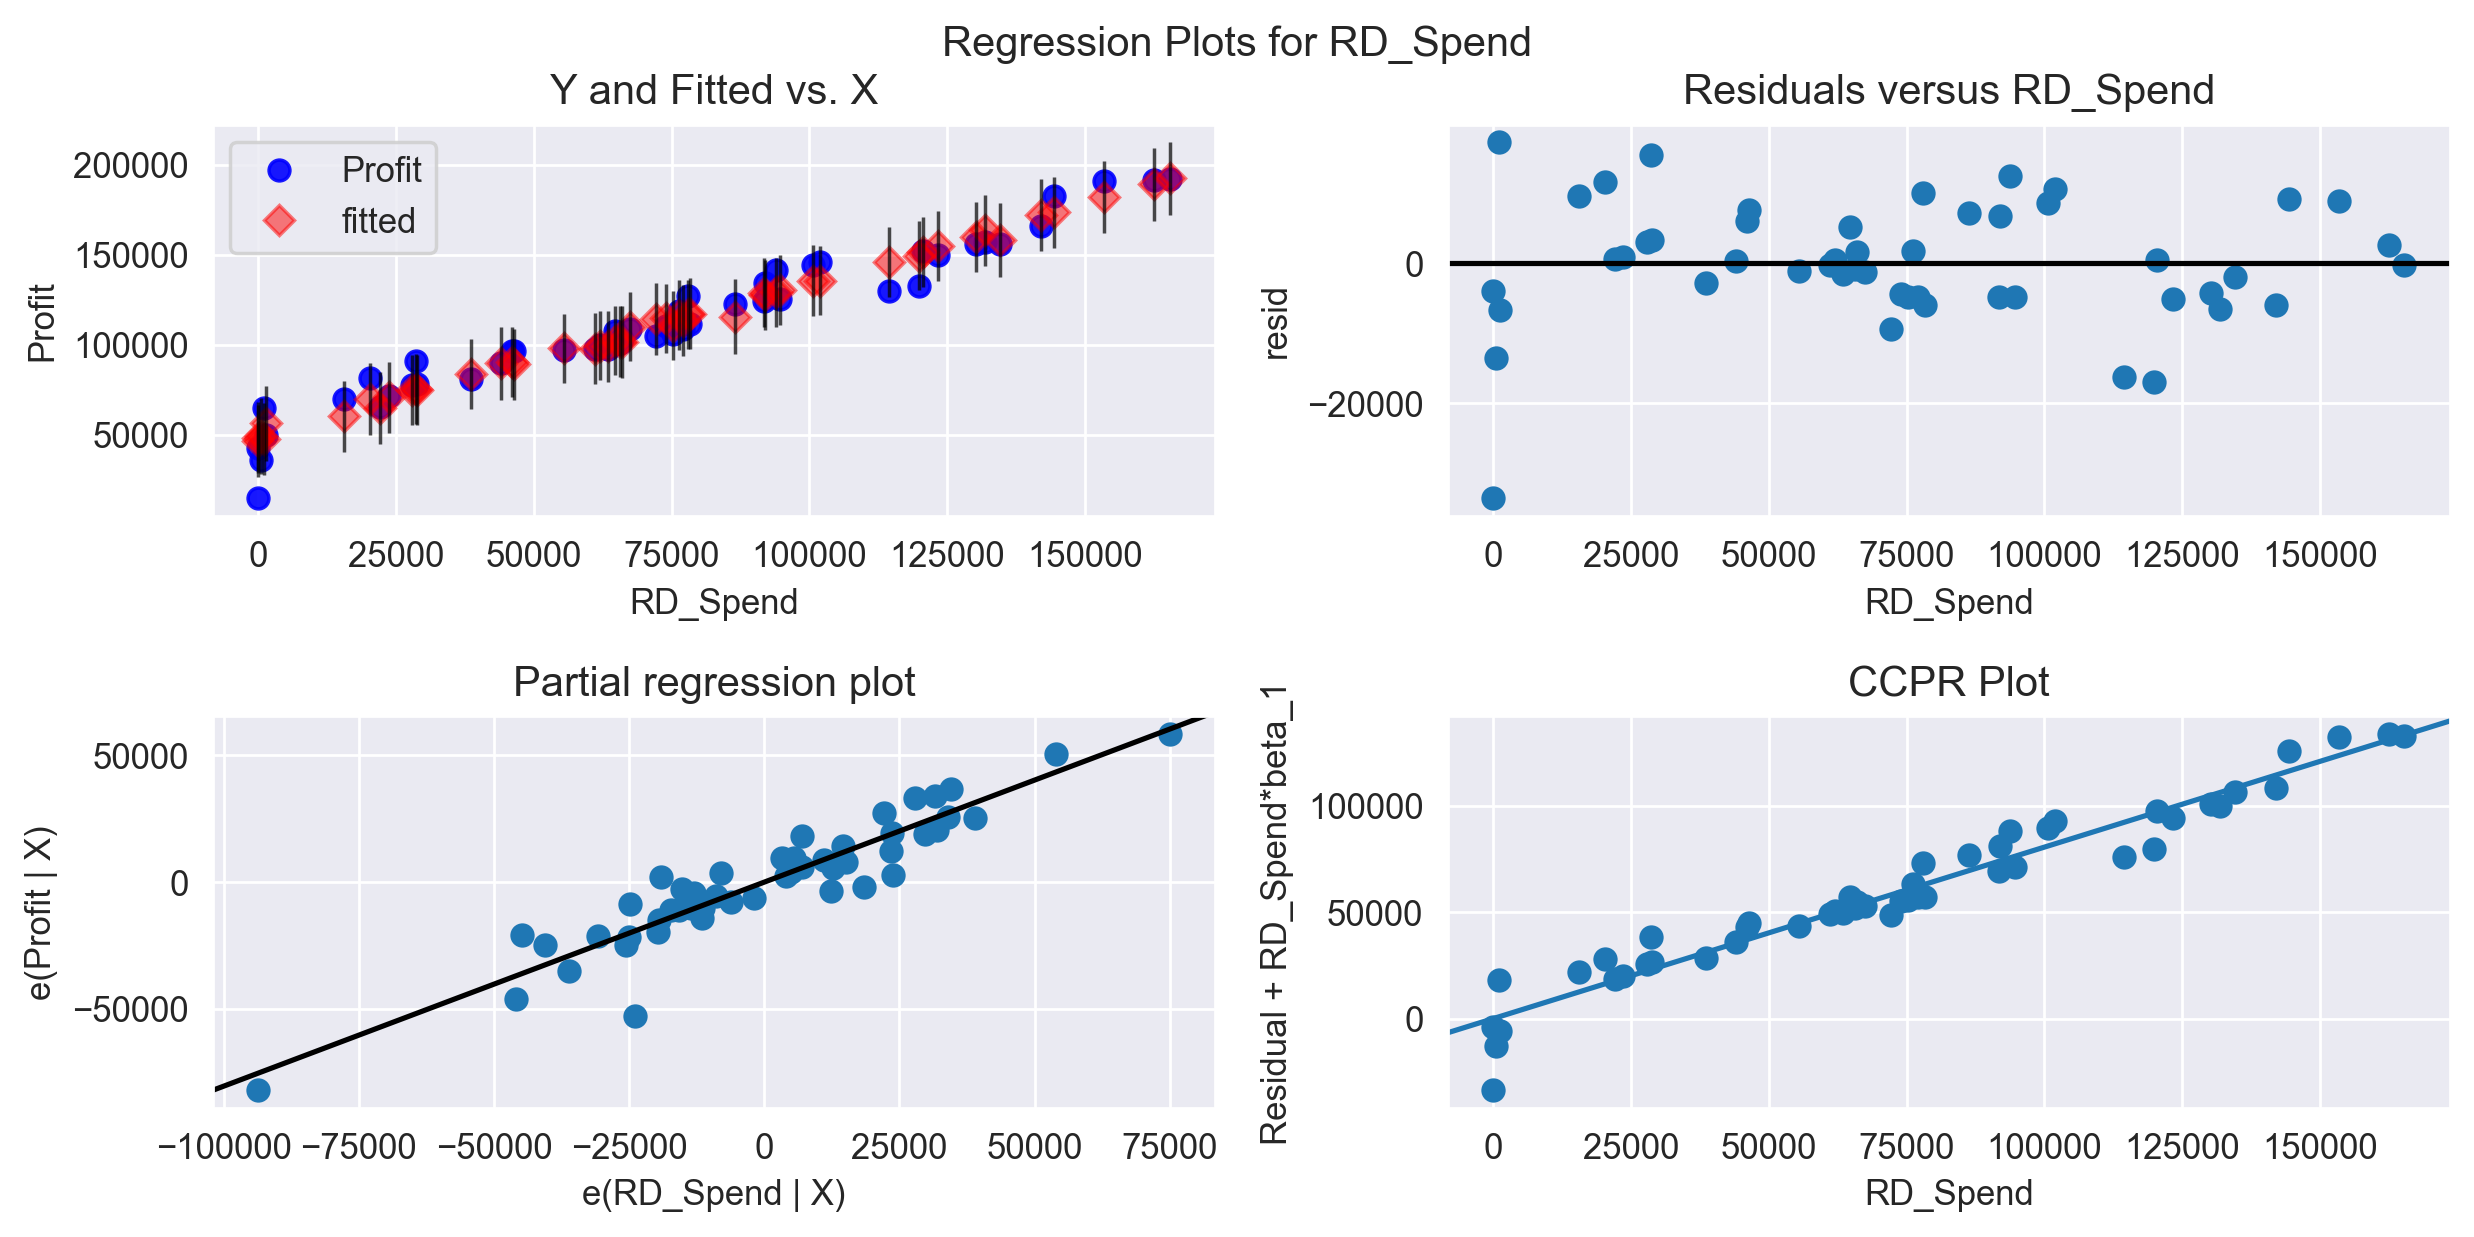

In [75]:
fig = plt.figure(figsize =(15,8))
sa.graphics.plot_regress_exog(model, 'RD_Spend');


eval_env: 1


<Figure size 3750x2000 with 0 Axes>

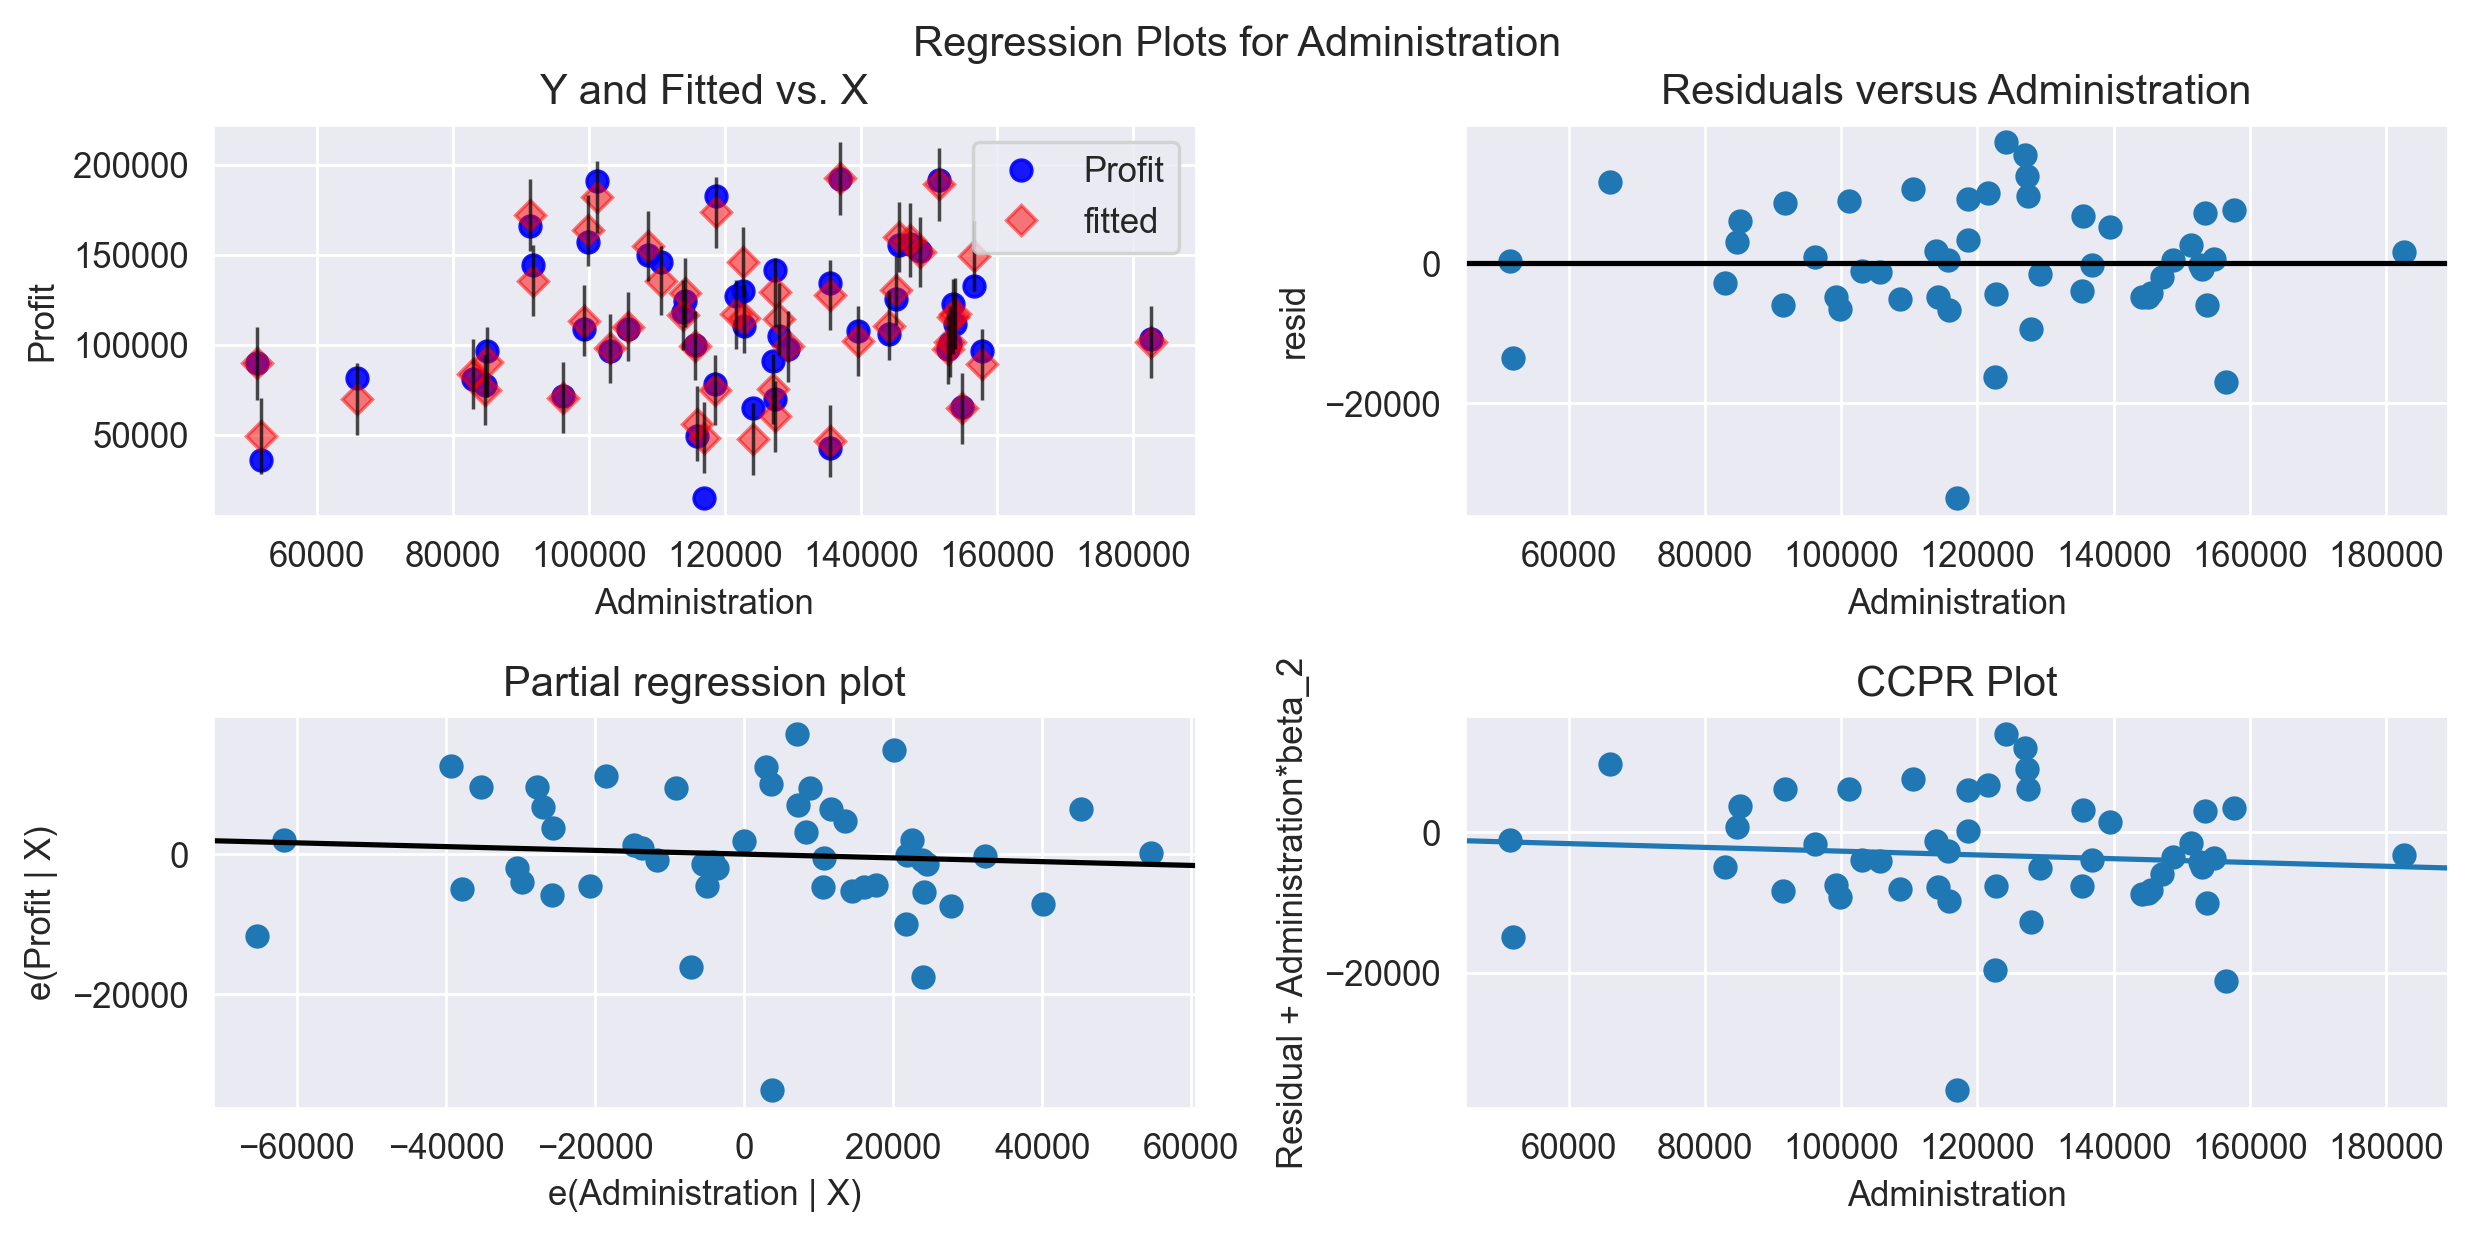

In [76]:
fig = plt.figure(figsize =(15,8))
sa.graphics.plot_regress_exog(model, 'Administration');

eval_env: 1


<Figure size 3750x2000 with 0 Axes>

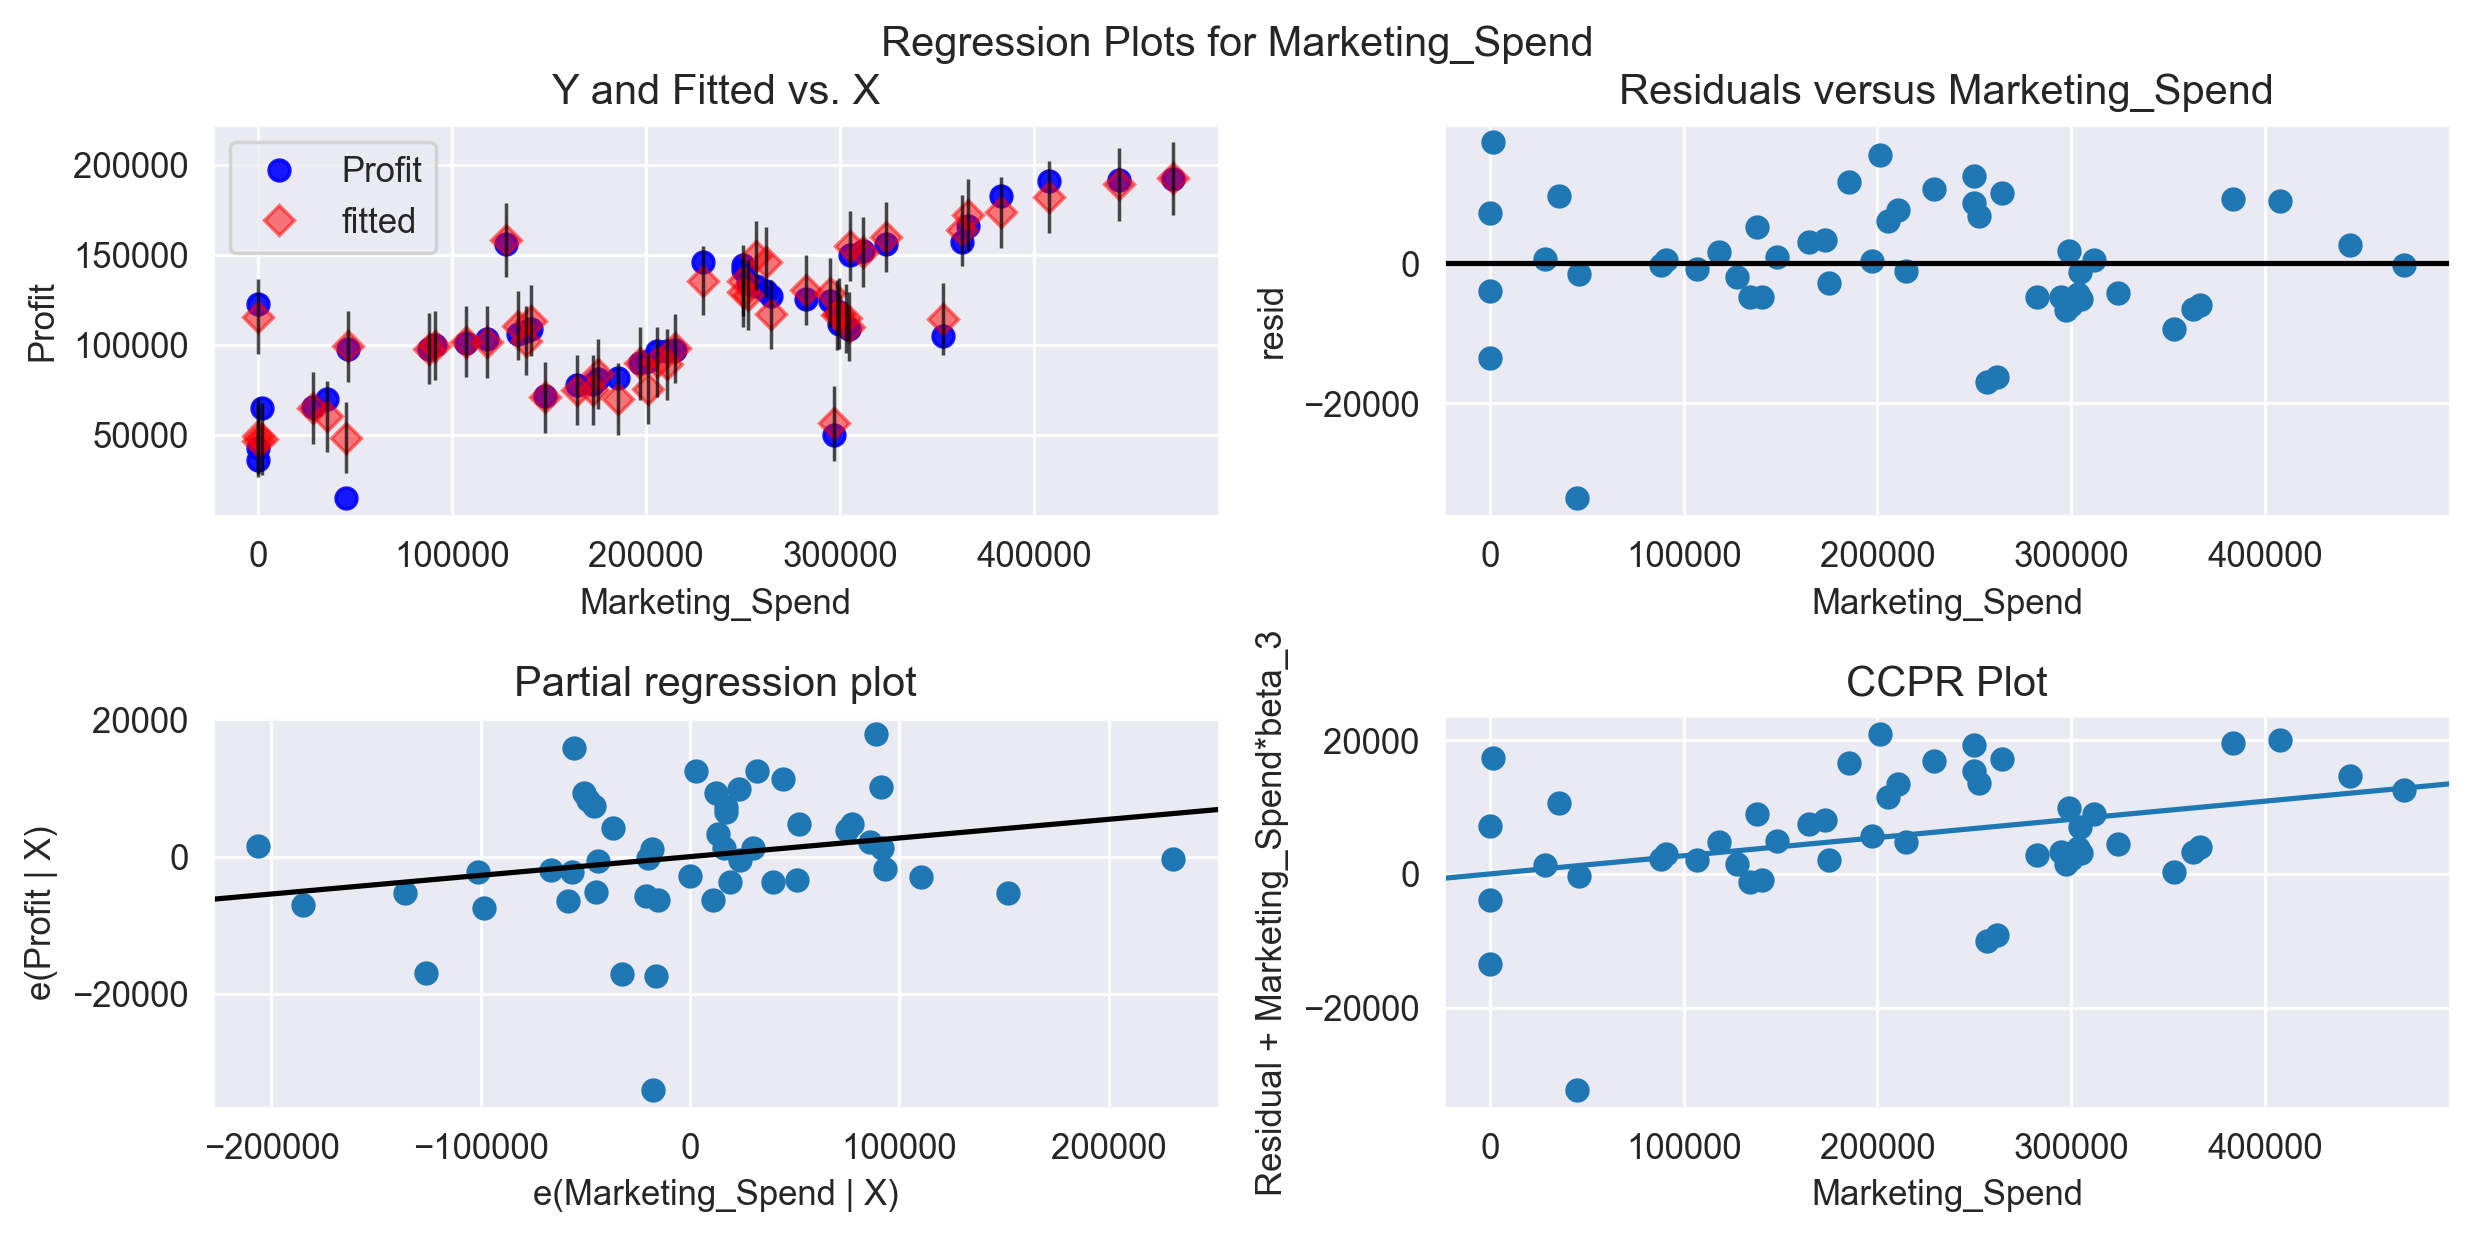

In [77]:
fig = plt.figure(figsize =(15,8))
sa.graphics.plot_regress_exog(model, 'Marketing_Spend');

# Model Deletation

# Cooks Distance

In [78]:
inf = fmodel.get_influence()
c,p = inf.cooks_distance

In [79]:
c

array([1.57433968e-04, 2.39056332e-03, 2.85216621e-02, 3.00496726e-02,
       5.51115967e-03, 9.62664565e-03, 3.56297032e-03, 3.68449187e-03,
       2.05003053e-06, 5.77349618e-03, 1.21060769e-02, 1.84112979e-02,
       1.12208976e-02, 7.57975217e-03, 4.60298293e-02, 5.49708059e-02,
       1.82692365e-02, 5.26653205e-03, 1.98801210e-03, 4.74854355e-02,
       7.73403394e-04, 1.12886183e-02, 3.03241675e-03, 2.25977252e-04,
       3.54390857e-03, 4.38104667e-03, 3.34913348e-03, 4.02927812e-02,
       2.97774079e-06, 5.09065707e-04, 1.13556092e-04, 1.87257555e-04,
       8.45915666e-04, 5.73543370e-05, 8.50829827e-03, 1.01006111e-02,
       4.13298060e-02, 7.70482800e-04, 5.78530408e-02, 7.48224487e-04,
       2.43846986e-03, 1.98264548e-03, 3.83186823e-04, 3.20880332e-02,
       2.82299337e-05, 1.37125766e-01, 5.70335573e-02, 7.76056506e-03,
       6.51162217e-02, 3.88902612e-01])

In [80]:
p

array([0.99999995, 0.99998811, 0.9983708 , 0.99819553, 0.99993712,
       0.99980927, 0.99997364, 0.99997182, 1.        , 0.99993101,
       0.99969945, 0.99931116, 0.99974147, 0.99988141, 0.99586206,
       0.99417344, 0.99932161, 0.99994256, 0.99999178, 0.99560538,
       0.99999875, 0.99973836, 0.99998089, 0.99999989, 0.99997392,
       0.9999602 , 0.9999767 , 0.99680307, 1.        , 0.99999946,
       0.99999997, 0.99999993, 0.99999851, 0.99999999, 0.99985077,
       0.99979017, 0.99664139, 0.99999876, 0.99357295, 0.99999883,
       0.99998763, 0.99999182, 0.99999969, 0.99794845, 1.        ,
       0.96772272, 0.99374642, 0.99987571, 0.99194185, 0.81548033])

<StemContainer object of 3 artists>

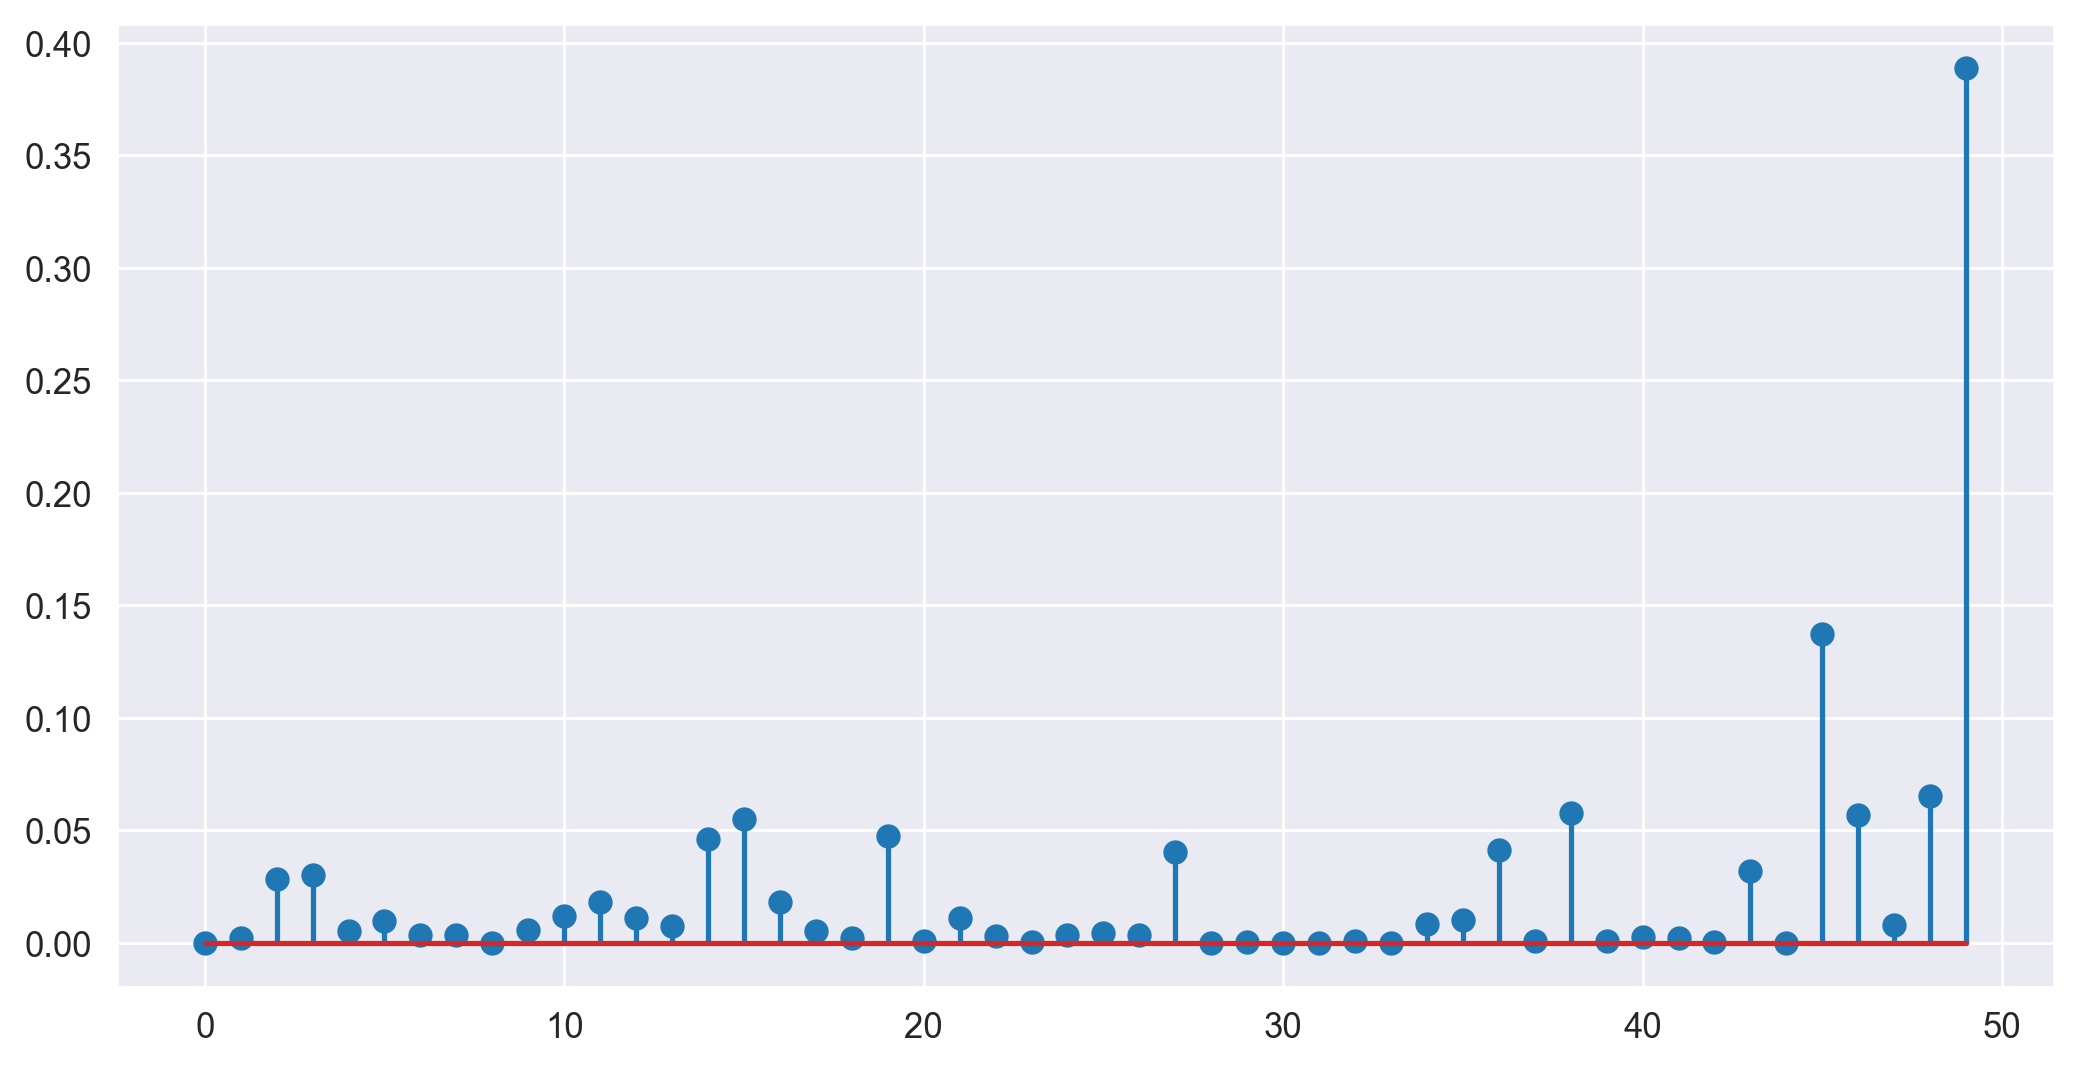

In [81]:
plt.stem(c)

In [82]:
np.argmax(c),np.max(c)

(49, 0.38890261150812816)

In [83]:
df.iloc[[49]]

,RD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


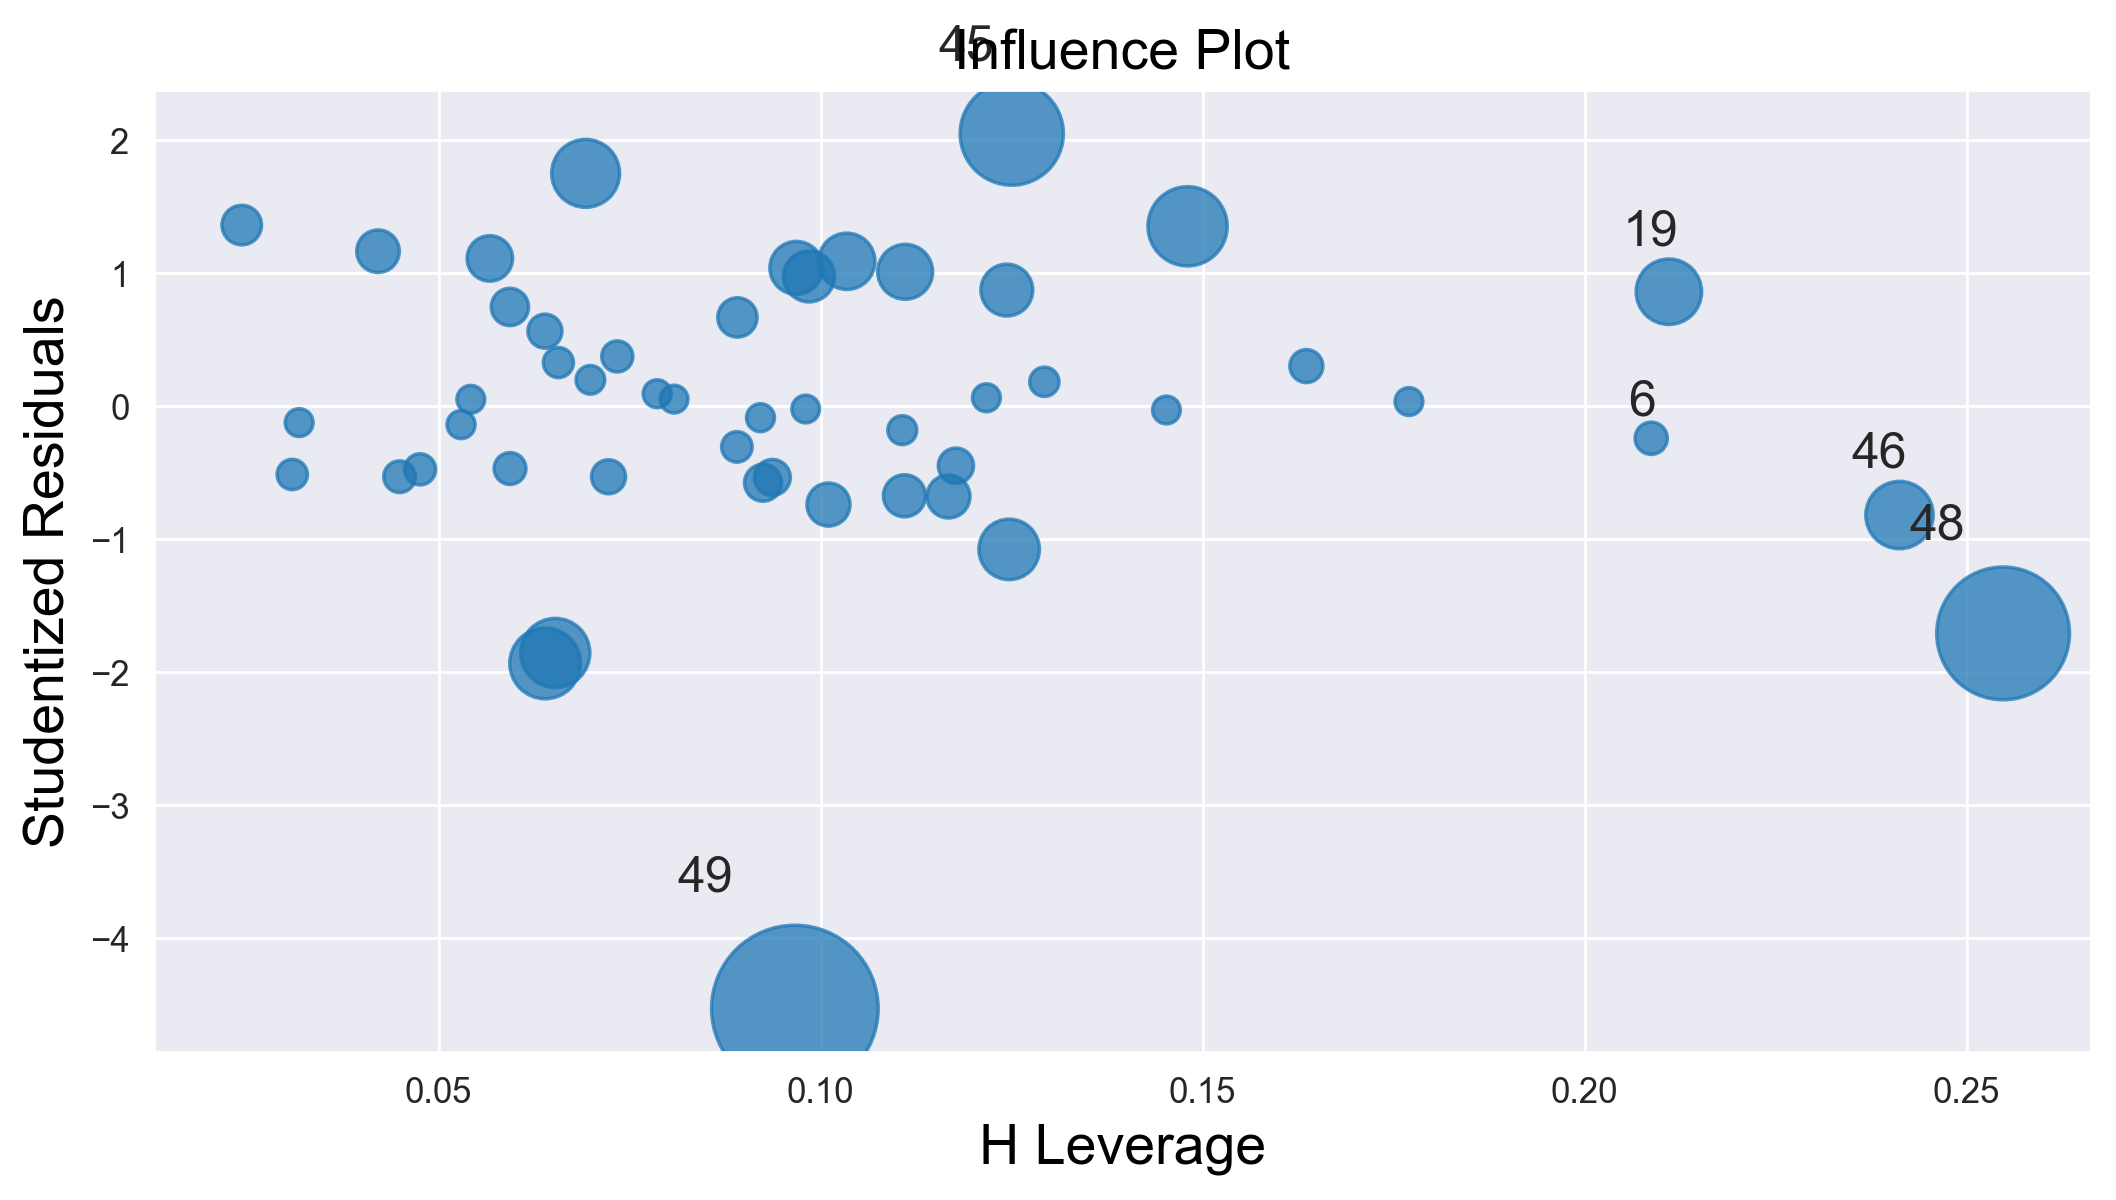

In [84]:
influence_plot(model);

# Leverage Cutoff

In [85]:
k = len(df.columns)
n = len(df)
k

5

In [86]:
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.36

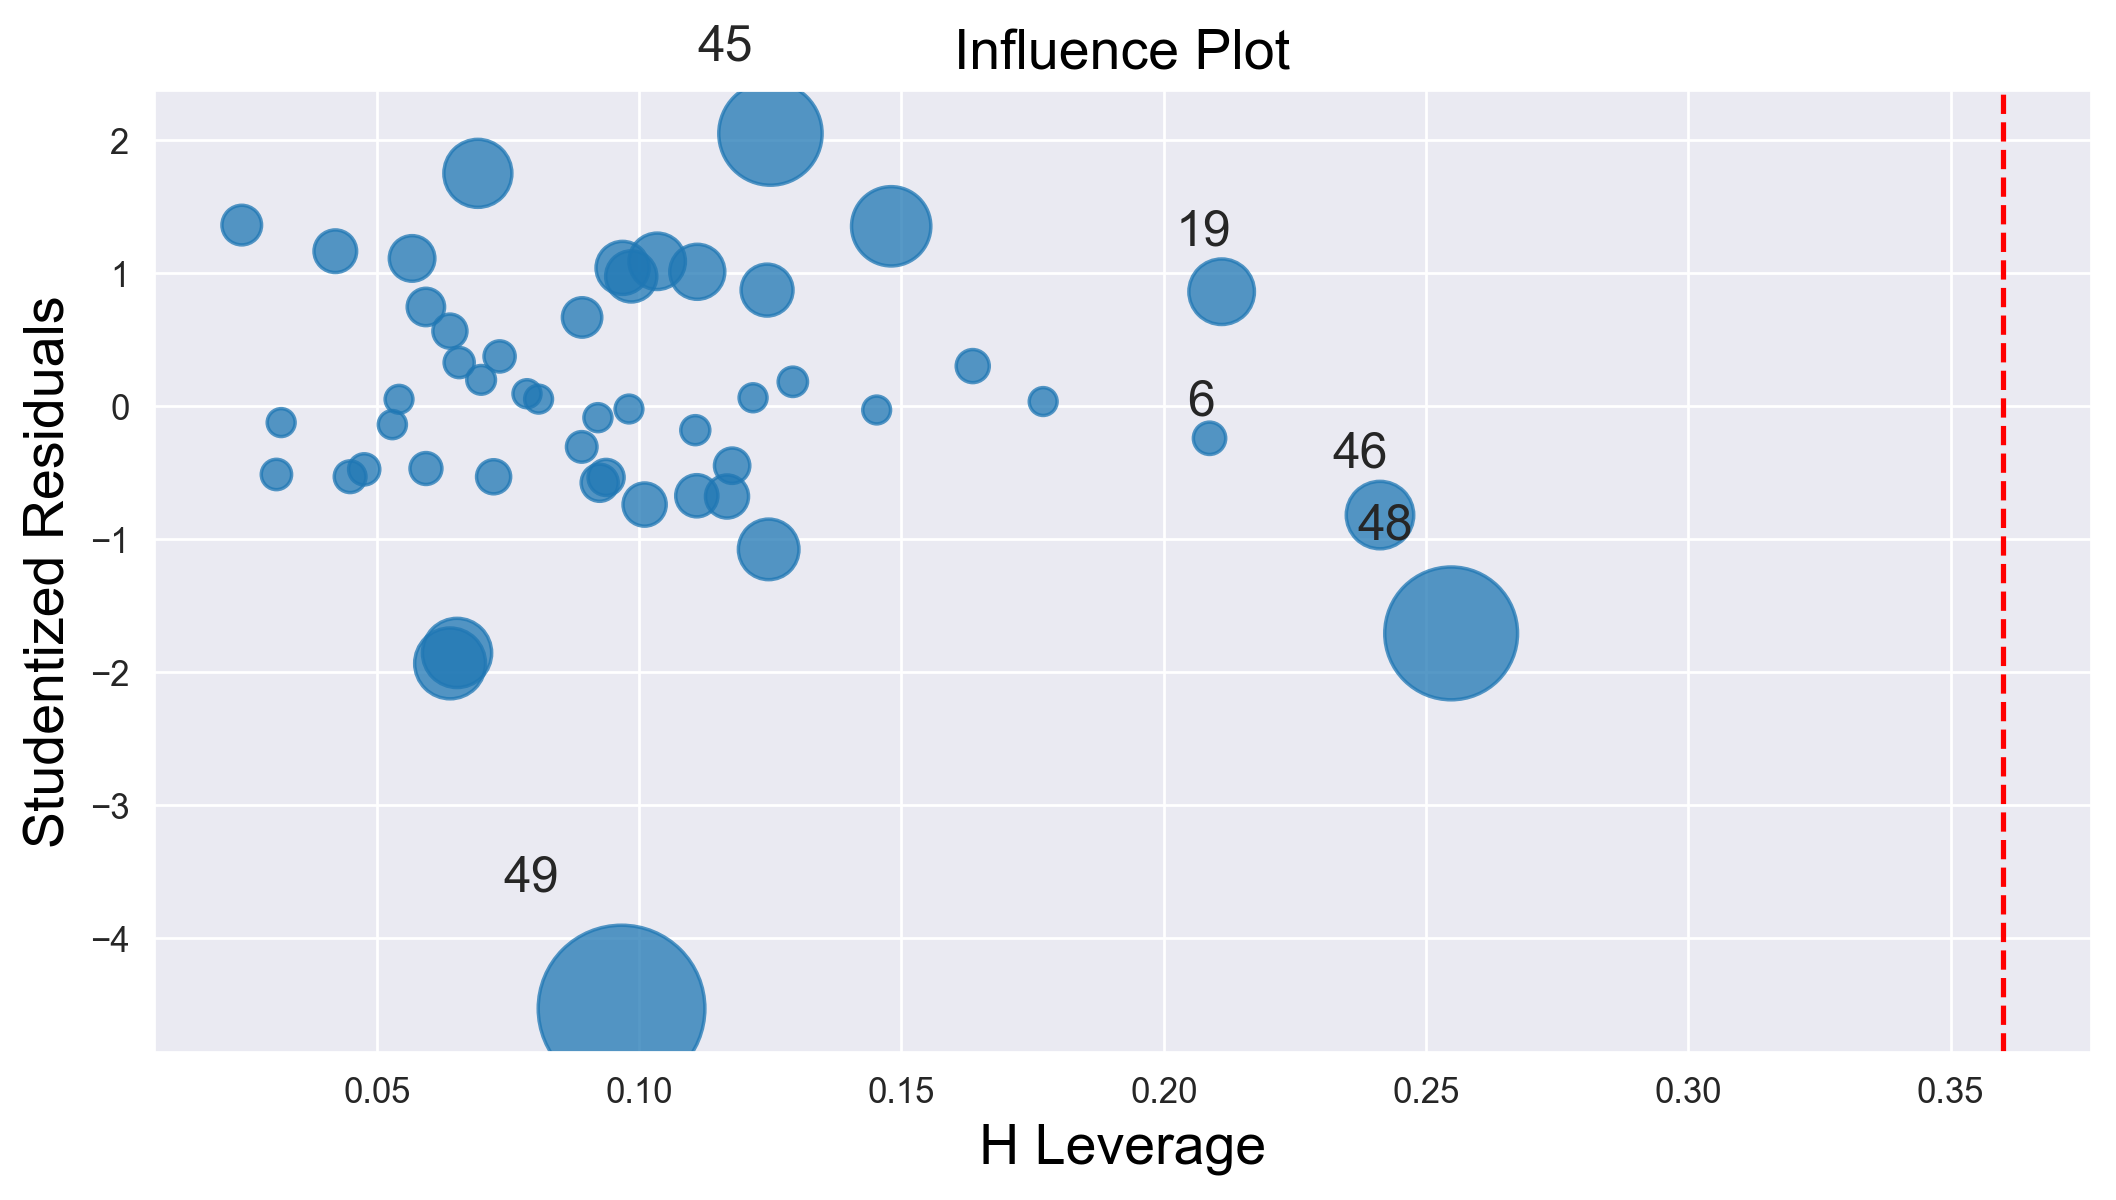

In [87]:
influence_plot(model)
plt.axvline(leverage_cutoff, linestyle = "--", color = 'red')

# Improving Model

In [38]:
df.drop(index = [49],inplace= True)
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Final Model

In [39]:
finalm = smf.ols('Profit~RD_Spend+Marketing_Spend+State',data=df).fit()

In [40]:
finalm.rsquared

0.9615203861714393

# Model Predictions

In [45]:
ndata = pd.DataFrame({'RD_Spend':7000,'Administration':9000,'Marketing_Spend':10000,'State':3},index=[0])
ndata

,RD_Spend,Administration,Marketing_Spend,State
0,7000,9000,10000,3


In [49]:
finalm.predict(ndata)

0    53503.733826
dtype: float64

In [50]:
d2 = {'prep_Model':['Model','final_model'],'Rsquared':[model.rsquared,finalm.rsquared]}
table = pd.DataFrame(d2)
table

,prep_Model,Rsquared
0,Model,0.950746
1,final_model,0.961520
